In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'../DATA/news-popularity/OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.drop(['url',' timedelta'],inplace=True,axis=1)


# df.loc[(df[' data_channel_is_lifestyle']==1),'category']=1
# df.loc[(df[' data_channel_is_entertainment']==1),'category']=2
# df.loc[(df[' data_channel_is_bus']==1),'category']=3
# df.loc[(df[' data_channel_is_socmed']==1),'category']=4
# df.loc[(df[' data_channel_is_tech']==1),'category']=5
# df.loc[(df[' data_channel_is_world']==1),'category']=6
# df['category'].fillna(0,inplace=True)
# df.drop([' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',' data_channel_is_tech',' data_channel_is_world'],inplace=True,axis=1)

# df.loc[(df[' weekday_is_saturday']==1),'day_of_week']=1
# df.loc[(df[' weekday_is_sunday']==1),'day_of_week']=2
# df.loc[(df[' weekday_is_monday']==1),'day_of_week']=3
# df.loc[(df[' weekday_is_tuesday']==1),'day_of_week']=4
# df.loc[(df[' weekday_is_wednesday']==1),'day_of_week']=5
# df.loc[(df[' weekday_is_thursday']==1),'day_of_week']=6
# df.loc[(df[' weekday_is_friday']==1),'day_of_week']=7
# df.drop([' weekday_is_saturday',' weekday_is_sunday',' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday'],inplace=True,axis=1)

In [4]:
# df['shares_log'] = np.log1p(df[' shares'])

In [5]:
data = df[df[' n_tokens_content']<4000]
data = data[data[' n_unique_tokens']<100]
data = data[data[' num_hrefs']<100]
data = data[data[' num_imgs']<60]
data = data[data[' num_videos']<40]
data = data[data[' kw_min_min']<40]
data = data[data[' kw_max_min']<100000]
data = data[data[' kw_avg_min']<20000]
data = data[data[' kw_avg_max']<600000]
data = data[data[' kw_min_max']<200000]
data = data[data[' kw_max_avg']<150000]
data = data[data[' kw_avg_avg']<20000]
data = data[data[' self_reference_min_shares']<200000]
data = data[data[' self_reference_max_shares']<200000]
data = data[data[' self_reference_avg_sharess']<200000]

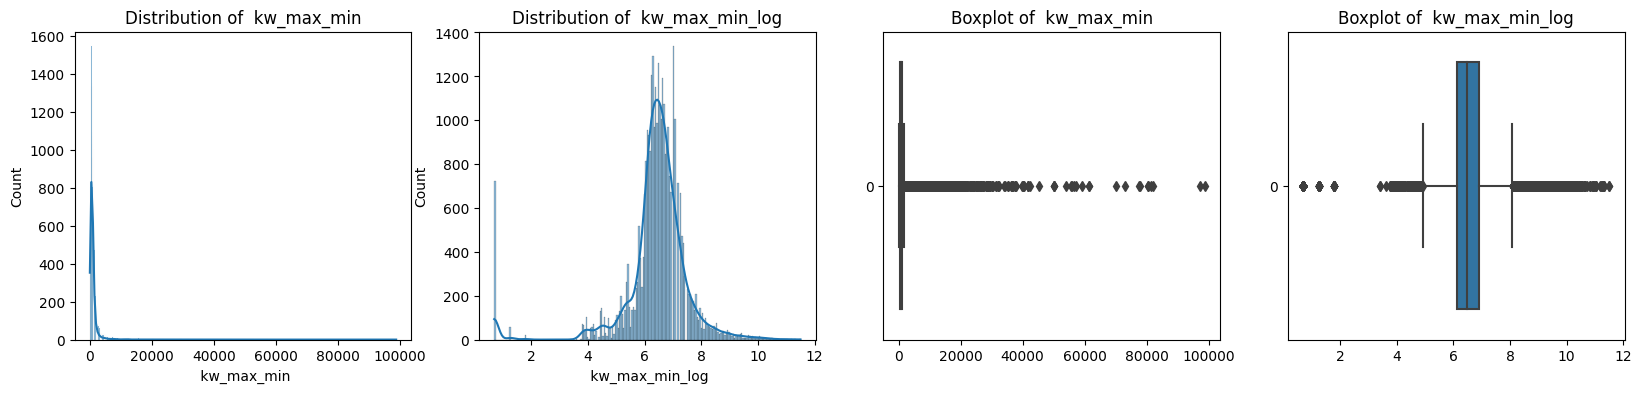

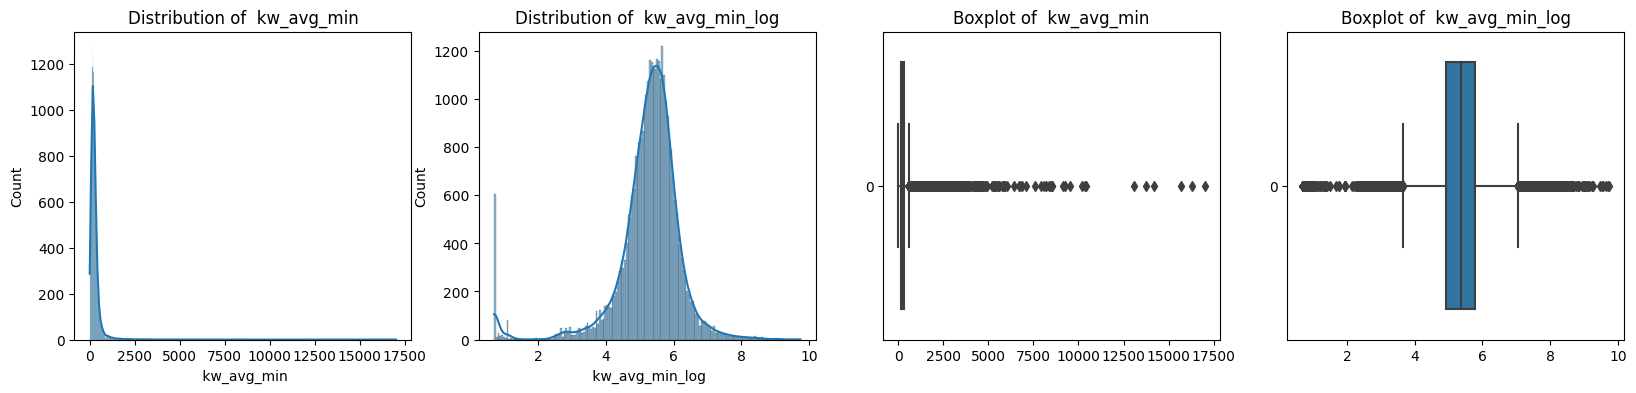

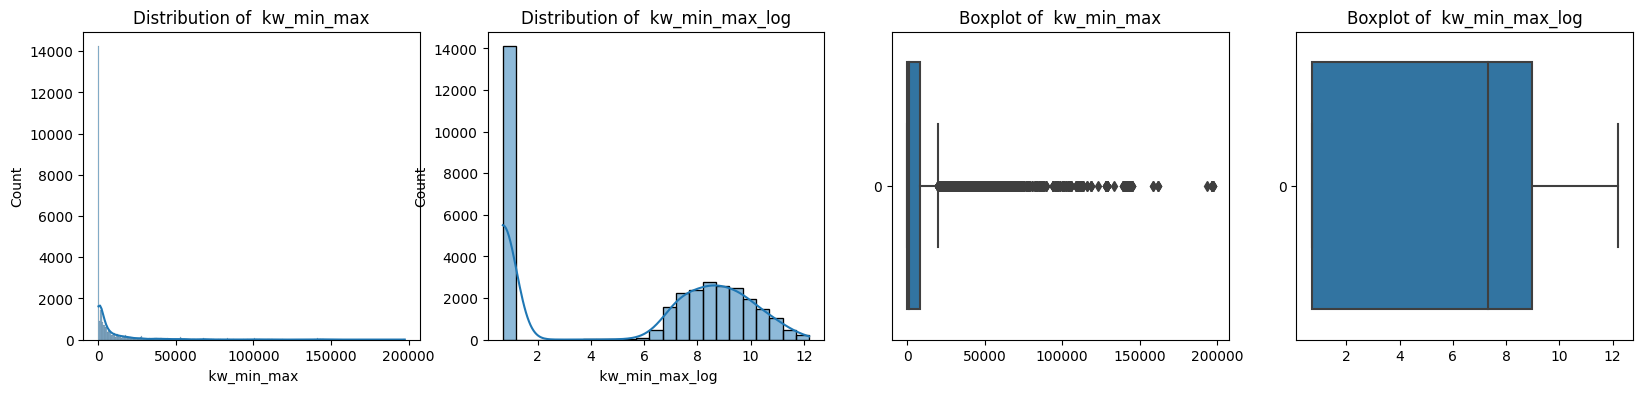

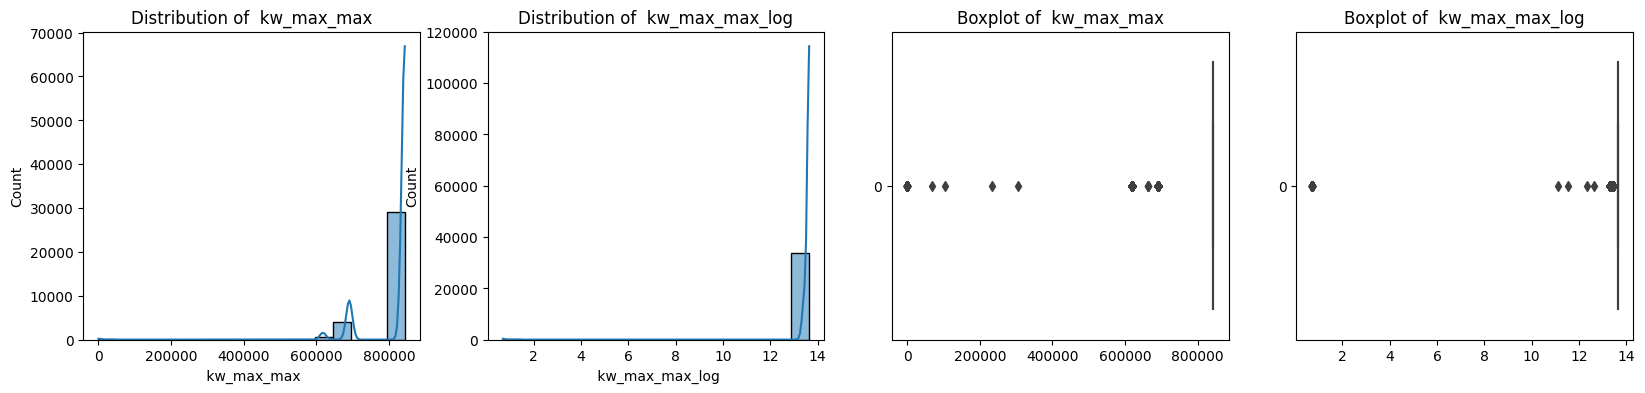

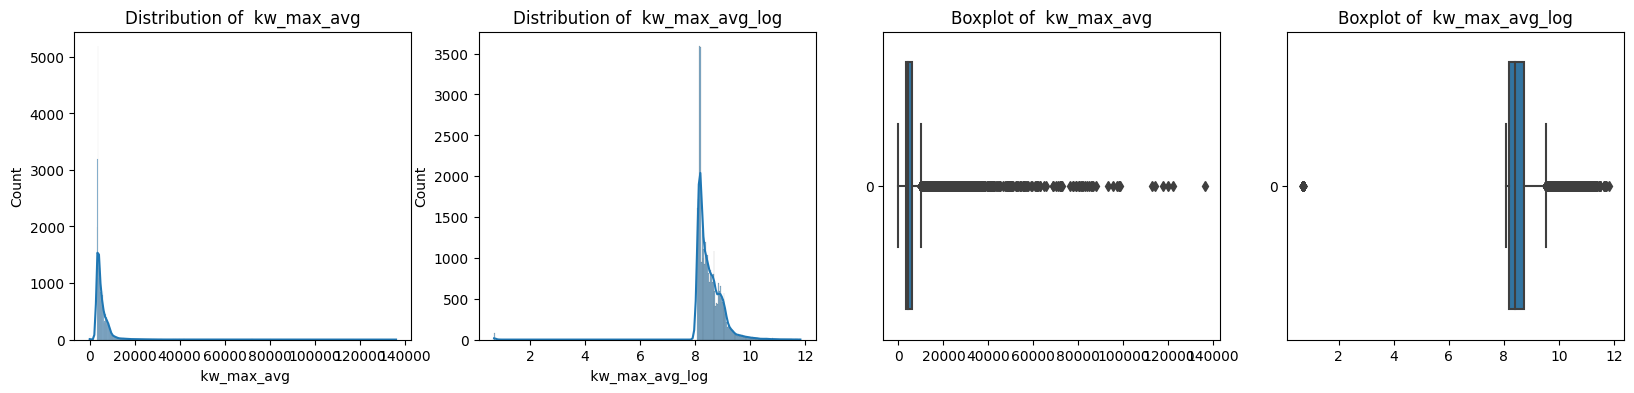

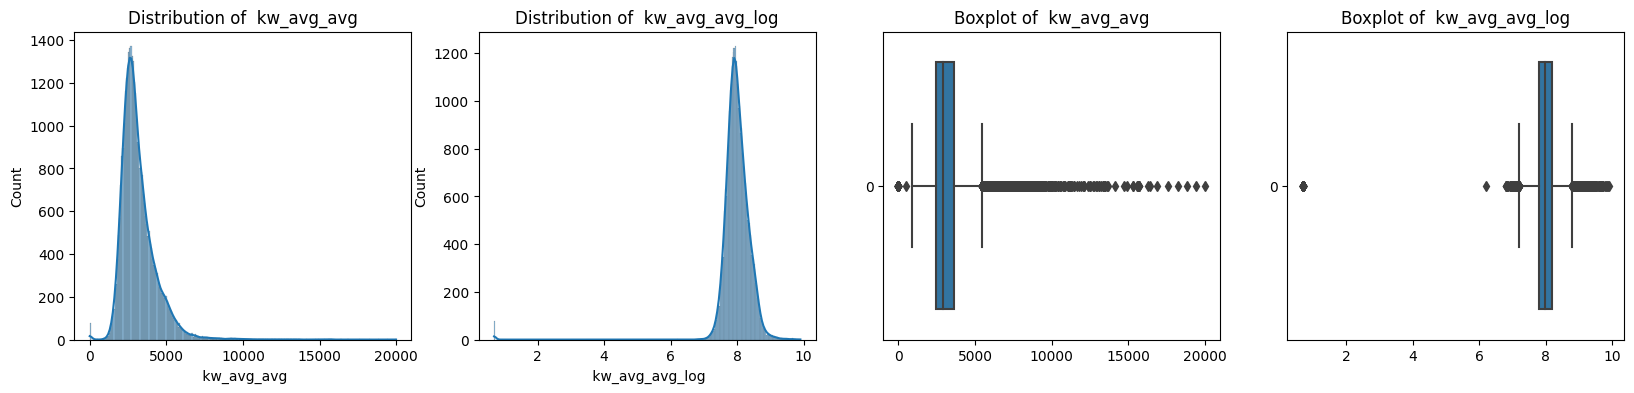

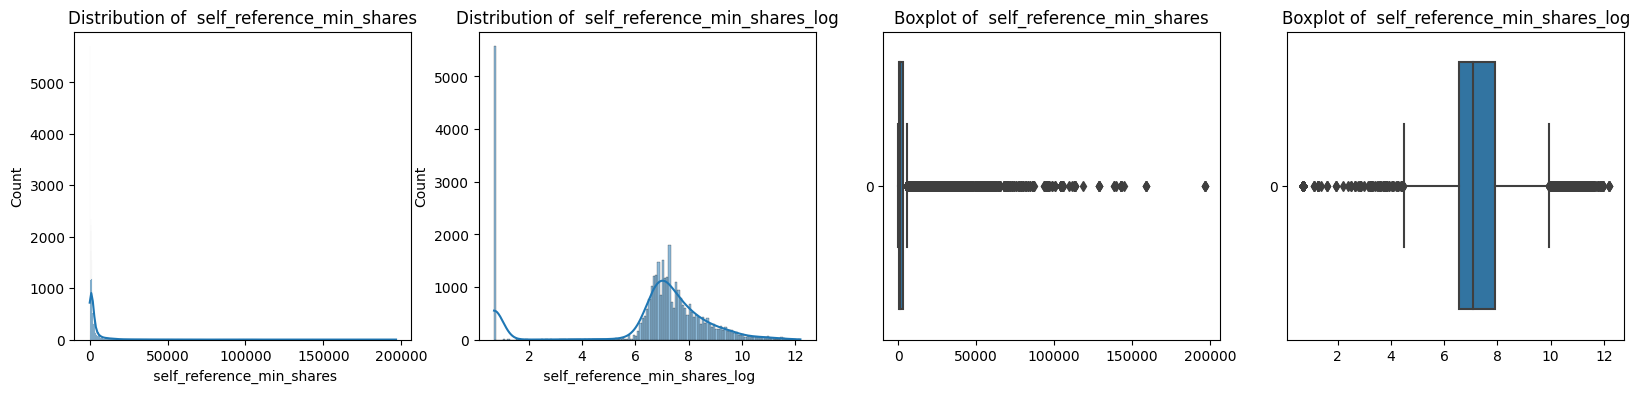

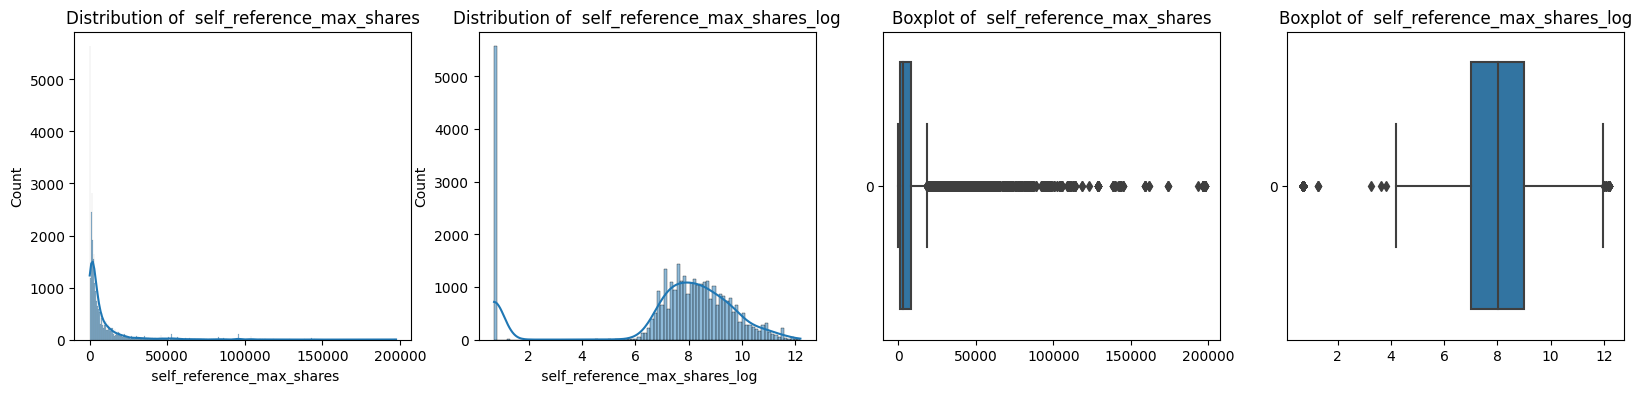

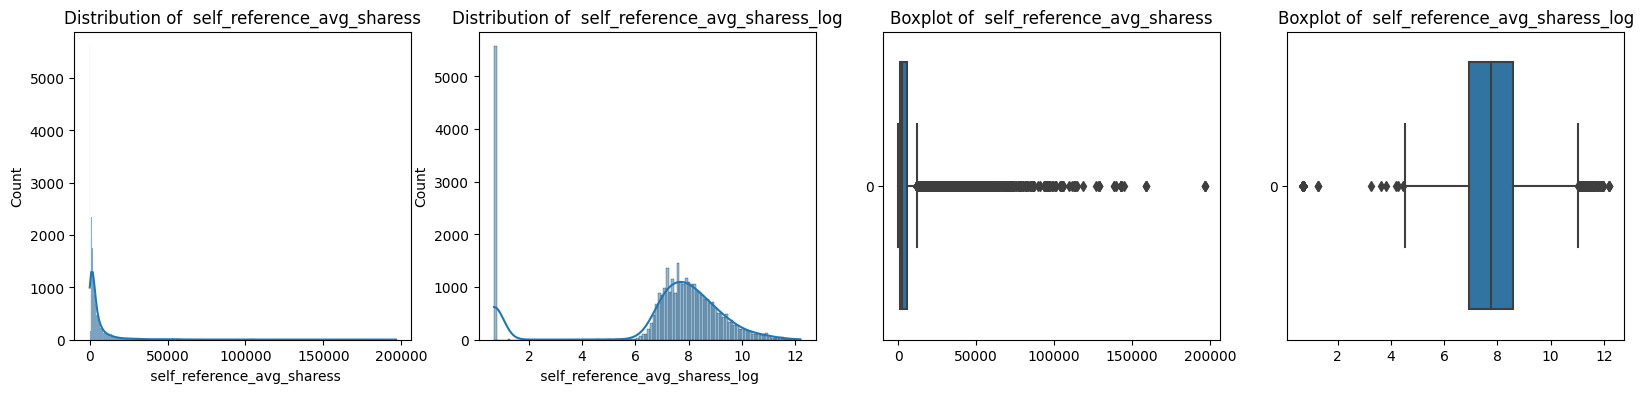

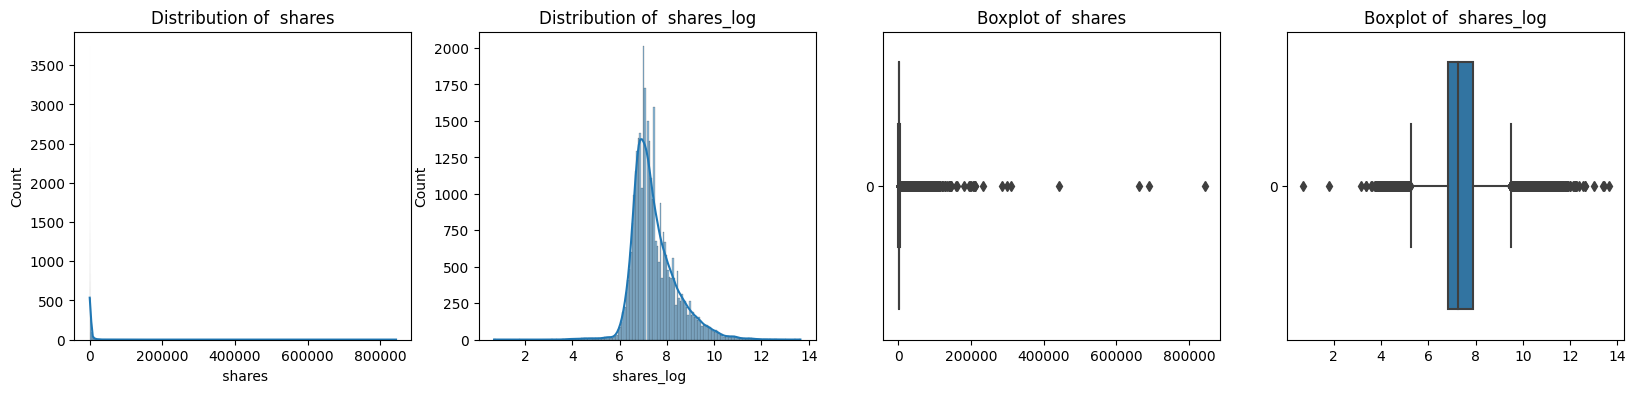

In [11]:
features_to_transform = [' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', 
                         ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', 
                         ' self_reference_max_shares', ' self_reference_avg_sharess', ' shares']

# Apply log transformation
for feature in features_to_transform:
    if (data[feature] <= 0).any():
        data[feature + '_log'] = np.log1p(data[feature] - data[feature].min() + 1)
    else:
        data[feature + '_log'] = np.log1p(data[feature])

# Dropping the original columns after transformation


# Visualize the distribution before and after log transformation
for feature in features_to_transform:
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    sns.histplot(data[feature], ax=ax[0], kde=True)
    ax[0].set_title(f'Distribution of {feature}')
    sns.histplot(data[feature + '_log'], ax=ax[1], kde=True)
    ax[1].set_title(f'Distribution of {feature}_log')
    sns.boxplot(data[feature], ax=ax[2], orient='h')
    ax[2].set_title(f'Boxplot of {feature}')
    sns.boxplot(data[feature + '_log'], ax=ax[3], orient='h')
    ax[3].set_title(f'Boxplot of {feature}_log')
    plt.show()

data.drop(features_to_transform, axis=1, inplace=True)

In [ ]:
df

In [6]:
print(df.shape)
print(data.shape)

(39644, 59)
(33857, 59)


In [7]:
len(data.columns)

59

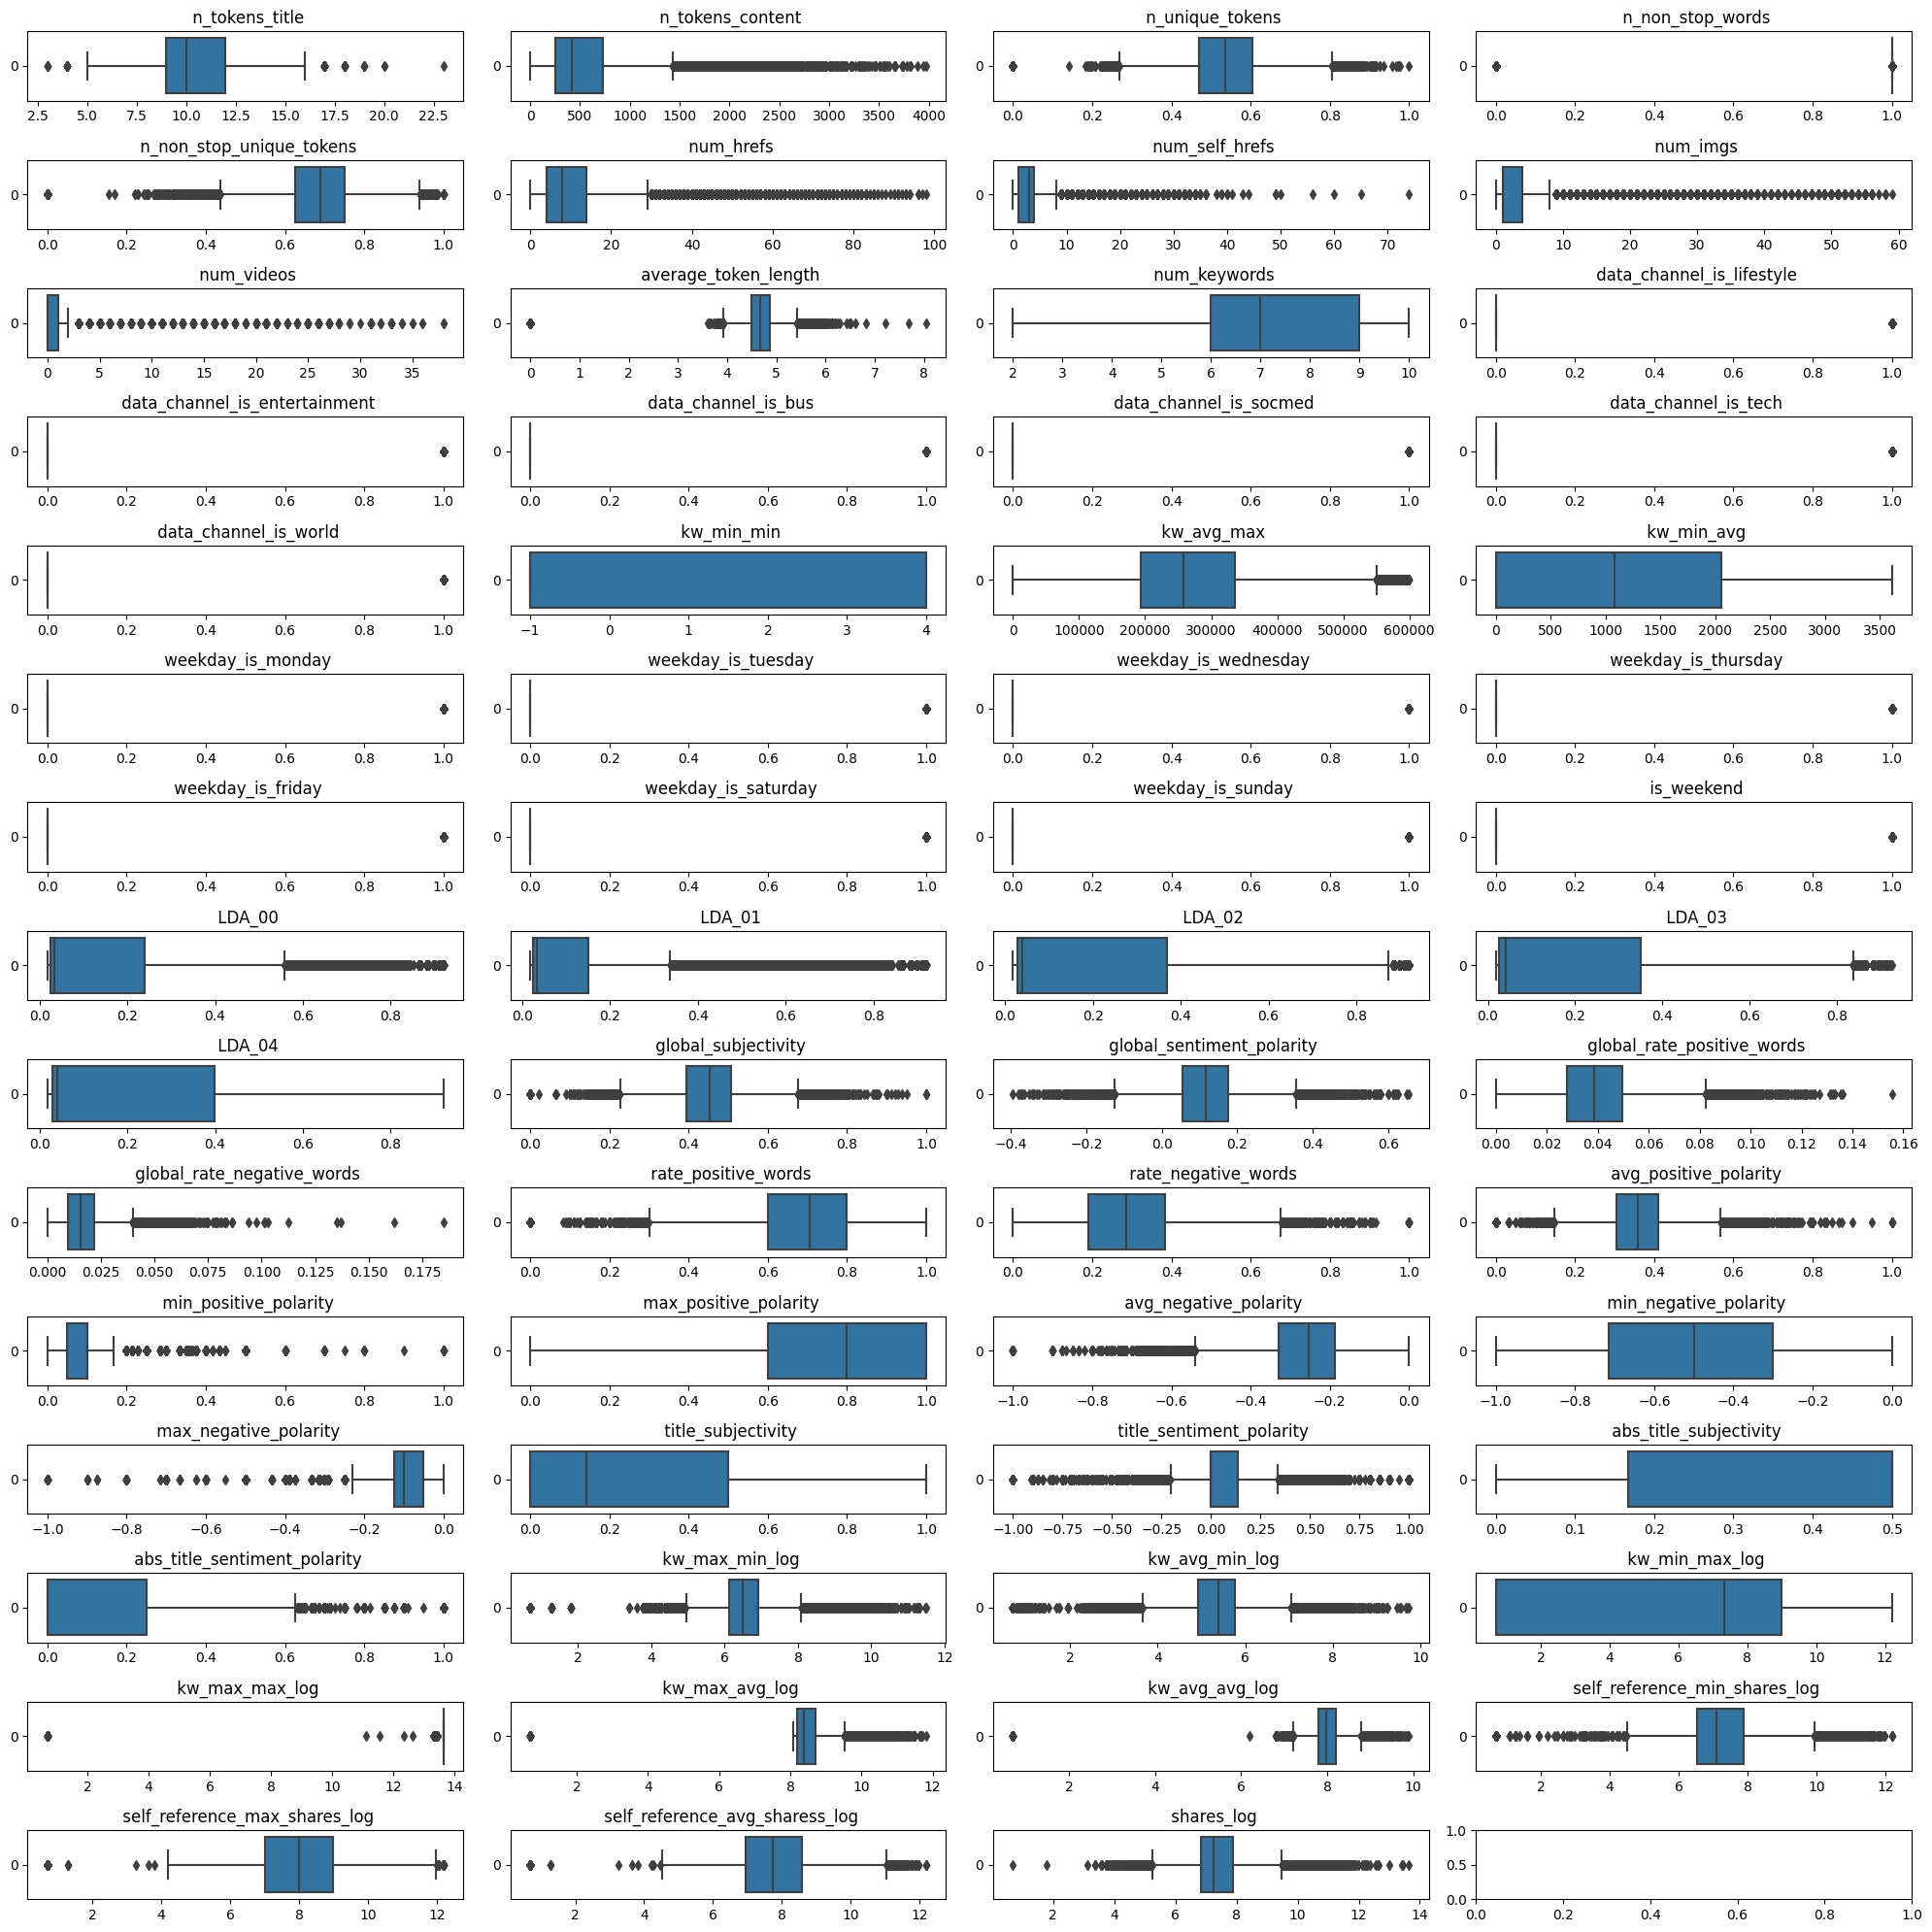

In [12]:
num_cols = data.select_dtypes(['int64', 'float64']).columns

# Create a 4x3 grid of subplots
fig, axes = plt.subplots(15, 4, figsize=(20, 20))

# Plot each numeric column
for i, col in enumerate(num_cols):
    row, col_num = divmod(i, 4)
    sns.boxplot(data[col], ax=axes[row, col_num],orient='h')
    axes[row, col_num].set_title(col)

plt.tight_layout()
plt.show()

In [13]:
from scipy.stats import zscore

features=[' n_unique_tokens',' n_non_stop_unique_tokens',' average_token_length',' global_subjectivity', ' global_sentiment_polarity',' avg_positive_polarity',' title_sentiment_polarity',' kw_max_min_log',' kw_avg_min_log',' kw_avg_avg_log',' self_reference_min_shares_log',' self_reference_avg_sharess_log', ' shares_log']
z_scores = np.abs(data[features].apply(zscore))

threshold = 3

outliers = (z_scores > threshold).any(axis=1)

final_df = data[~outliers]

In [14]:
final_df.shape

(30412, 59)

In [15]:
correlations = final_df.corr()[' shares_log'].sort_values(ascending=False)
print(correlations)

 shares_log                        1.000000
 kw_avg_avg_log                    0.275792
 kw_max_avg_log                    0.212429
 self_reference_avg_sharess_log    0.137711
 self_reference_min_shares_log     0.137582
 self_reference_max_shares_log     0.131351
 is_weekend                        0.130938
 global_subjectivity               0.128477
 kw_min_avg                        0.123520
 num_hrefs                         0.112805
 LDA_03                            0.107252
 data_channel_is_socmed            0.102470
 num_imgs                          0.097112
 weekday_is_sunday                 0.091352
 weekday_is_saturday               0.087239
 global_sentiment_polarity         0.075329
 data_channel_is_tech              0.074077
 kw_avg_min_log                    0.072535
 kw_max_min_log                    0.072408
 global_rate_positive_words        0.069830
 max_positive_polarity             0.067834
 kw_avg_max                        0.067297
 LDA_04                         

Numerical columns: Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_avg_max', 'kw_min_avg', 'is_weekend',
       'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'category', 'day_of_week',
       'kw_max_min_log', 'kw_avg_min_log', 'kw_min_max_log', 'kw_max_max_log',
       'kw_max_avg_log', 'kw_avg_avg_log', 'self_reference_min_shar

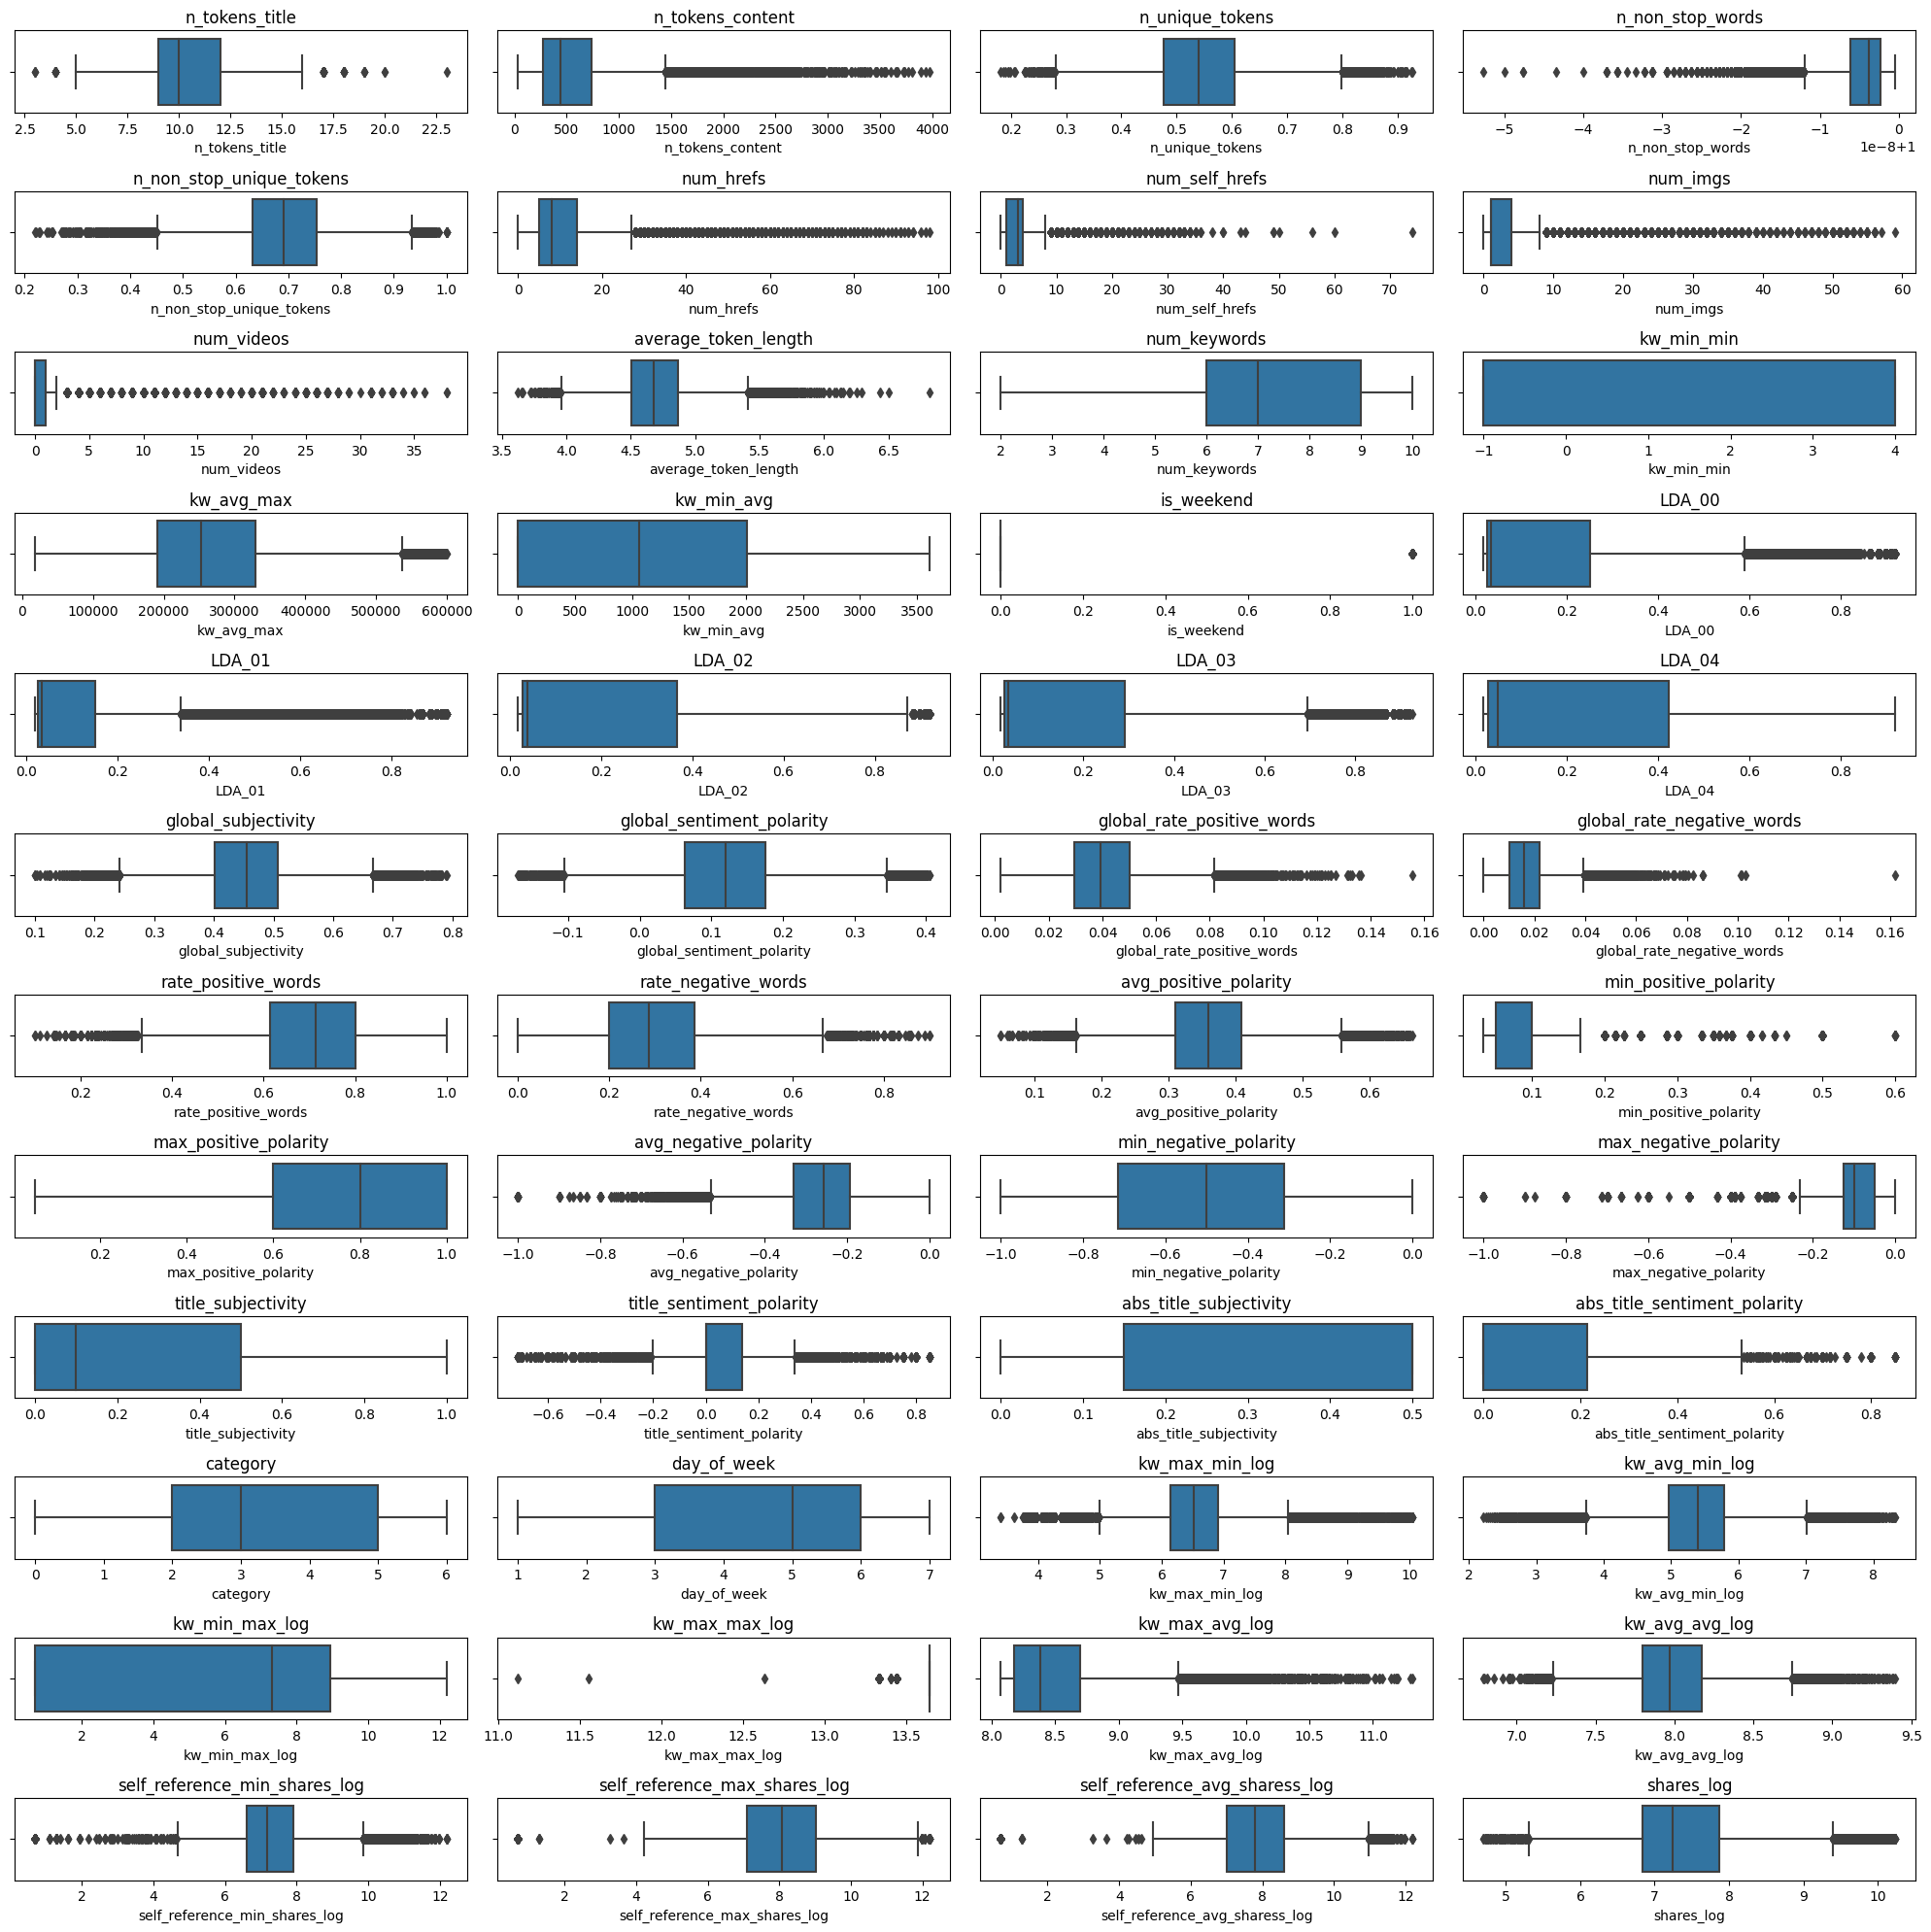

In [22]:
final_df.columns = final_df.columns.str.strip()

num_cols = final_df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(12, 4, figsize=(20, 20))
axes = axes.flatten()  

for i, col in enumerate(num_cols):
    sns.boxplot(x=final_df[col], ax=axes[i], orient='h')
    axes[i].set_title(col)

# Remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
final_df.columns = final_df.columns.str.strip()
final_df.drop(['n_tokens_title', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens','kw_max_max_log'],axis=1,inplace=True) 

<AxesSubplot: >

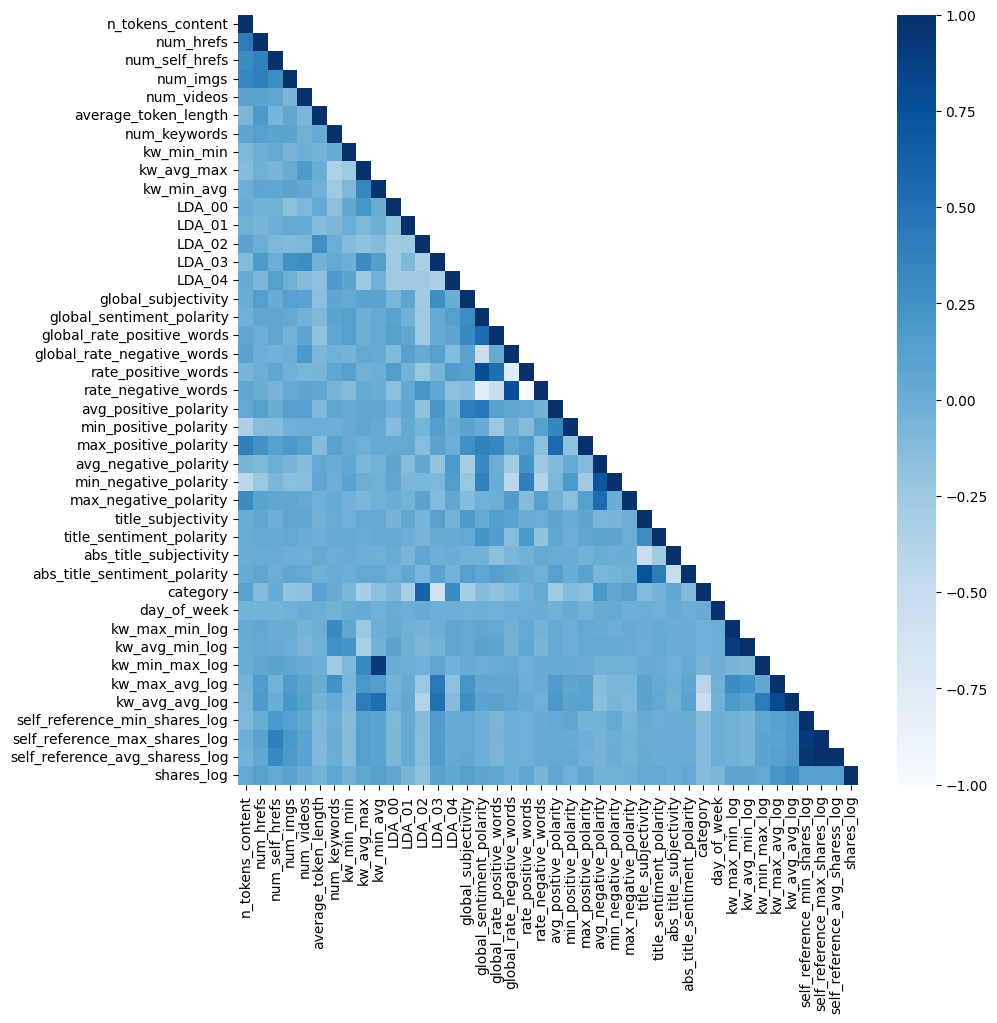

In [26]:
cor=final_df.corr()
#ns.heatmap(cor)
plt.figure(figsize=(10,10))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [17]:
X=final_df.drop(['shares_log'],axis=1)
y=final_df['shares_log']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
X_train = pd.DataFrame(X_scaled[:int(0.8 * len(X_scaled))])
X_test = pd.DataFrame(X_scaled[int(0.8 * len(X_scaled)):])
y_train = y[:int(0.8 * len(y))]
y_test = y[int(0.8 * len(y)):]

selected_features = []
remaining_features = list(range(X_train.shape[1]))
best_score = -np.inf  
feature_names = X.columns

# Forward selection
while remaining_features:
    scores = []
    for feature in remaining_features:
        # Select the current feature to add
        features_to_try = selected_features + [feature]
        X_train_subset = X_train.iloc[:, features_to_try]
        
        # Evaluate the performance using cross-validation
        LR = LinearRegression()
        cv_scores = cross_val_score(LR, X_train_subset, y_train, cv=5, scoring='neg_mean_squared_error')
        mean_score = np.mean(cv_scores)
        scores.append((mean_score, feature))
    
    # Find the best feature to add
    scores.sort(reverse=True, key=lambda x: x[0])
    best_new_score, best_new_feature = scores[0]
    
    # If the new score is better, update the selected features and best score
    if best_new_score > best_score:
        selected_features.append(best_new_feature)
        remaining_features.remove(best_new_feature)
        best_score = best_new_score
        print(f"Selected feature: {feature_names[best_new_feature]}, Cross-validated score: {best_new_score:.4f}")
    else:
        break

# Train the final model on the selected features
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
final_LR = LinearRegression()
final_LR.fit(X_train_selected, y_train)

# Evaluate on the test set
test_score = final_LR.score(X_test_selected, y_test)

print(f"Final selected features: {[feature_names[i] for i in selected_features]}")
print(f"Test set R^2 score: {test_score:.4f}")
pred=final_LR.predict(X_test_selected)
print(r2_score(y_test,pred))
print(mse(y_test,pred))

Selected feature: kw_avg_avg_log, Cross-validated score: -0.6612
Selected feature: is_weekend, Cross-validated score: -0.6527
Selected feature: data_channel_is_tech, Cross-validated score: -0.6449
Selected feature: data_channel_is_socmed, Cross-validated score: -0.6367
Selected feature: self_reference_min_shares_log, Cross-validated score: -0.6313
Selected feature: kw_min_max_log, Cross-validated score: -0.6271
Selected feature: kw_min_avg, Cross-validated score: -0.6217
Selected feature: LDA_00, Cross-validated score: -0.6184
Selected feature: n_tokens_content, Cross-validated score: -0.6154
Selected feature: data_channel_is_entertainment, Cross-validated score: -0.6139
Selected feature: global_subjectivity, Cross-validated score: -0.6129
Selected feature: kw_max_avg_log, Cross-validated score: -0.6122
Selected feature: kw_avg_max, Cross-validated score: -0.6113
Selected feature: kw_min_min, Cross-validated score: -0.6107
Selected feature: min_positive_polarity, Cross-validated score:

In [19]:
model_df=final_df[['kw_avg_avg_log', 'is_weekend', 'data_channel_is_tech', 'data_channel_is_socmed', 'self_reference_min_shares_log', 'kw_min_max_log', 'kw_min_avg', 'LDA_00', 'n_tokens_content', 'data_channel_is_entertainment', 'global_subjectivity', 'kw_max_avg_log', 'kw_avg_max', 'kw_min_min', 'min_positive_polarity', 'num_self_hrefs', 'num_hrefs', 'weekday_is_friday', 'weekday_is_monday', 'title_sentiment_polarity', 'kw_max_min_log', 'average_token_length', 'avg_positive_polarity', 'abs_title_sentiment_polarity', 'title_subjectivity', 'abs_title_subjectivity','shares_log']]

In [24]:
X=model_df.drop(['shares_log'],axis=1)
y=model_df['shares_log']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred_log = LR.predict(X_test)

y_pred = np.expm1(y_pred_log)
y_test_unlog = np.expm1(y_test)

print("Mean Squared Error (MSE):", mse(y_test, y_pred_log))
print("Mean Squared Error (MSE):", mse(y_test_unlog, y_pred))


Mean Squared Error (MSE): 0.5861477979411358
Mean Squared Error (MSE): 11822394.879928276
